#LABSHEET 3
## Linear Regression

NAME     : Abhinav Pandey

ROLL NO. : AM.EN.U4AIE21088


# PART A


## Question 1


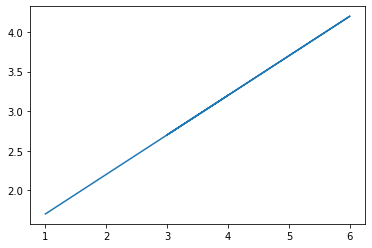

In [6]:
# Create  an  array  x  =  [1,  1,  2,  3,  4,  3,  4,  6,  4]  using  numpy.  Calculate  a  function h(x)=t0+t1*x, where t0=1.2 and t1=0.5, for all values of x and plot a graph with x on one axis and h(x)on another axis

import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
t0 = 1.2
t1 = 0.5
h = t0 + t1 * x
plt.plot(x, h)
plt.show()

## Question 2

In [7]:
# Create two arrays A and B with the following values using numpy array. Let (Ai,Bi) represent a data point with i th element of A and B. A = [1, 1, 2, 3, 4, 3, 4, 6, 4] B = [2, 1,  0.5,  1,  3,  3,  2,  5,  4]  Find  out  the  dot  product  of  the  vectors.  [Hint  use  numpy np.dot(a,b)]

A = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B = np.array([2, 1, 0.5, 1, 3, 3, 2, 5, 4])
np.dot(A, B)

82.0

## Question 3

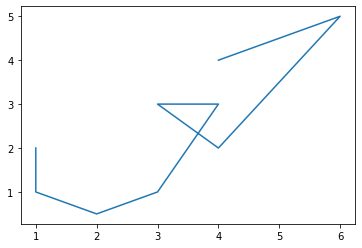

In [8]:
# Plot a graph marking the data points (Ai,Bi) with A on the X-axis and B on the Y-axis.

plt.plot(A, B)

## Question 4

In [9]:
# Calculate Mean Square Error (MSE) of A and B with the formulae where n is the no: of sample data points. 

n = len(A)
MSE = 1/n * np.sum((A-B)**2)
print(MSE)

1.472222222222222


## Question 5

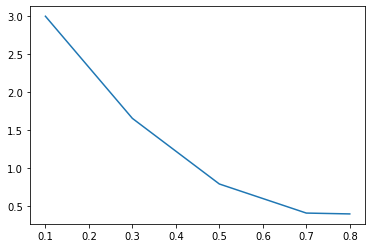

In [12]:
# Modify the above equation with the following cost function. Implement as a function with prototype def compute_cost_function(n,t1,A,B):

def compute_cost_function(n,t1,A,B):
    h = t1 * A
    sum_squared_error = np.square(np.dot(A, t1) - B).sum()
    cost = sum_squared_error / (2*n)
    return cost

t1 = np.array([0.1, 0.3, 0.5, 0.7, 0.8])
cost = np.array([])
for i in range(len(t1)):
    cost = np.append(cost, compute_cost_function(n,t1[i],A,B))
plt.plot(t1, cost)


# PART B

## Question 1

In [16]:
# a.Generate a new data set from student scores with one feature studytimeand output variable average grade = (G1+G2+G3)/3

import pandas as pd

df = pd.read_csv('student-mat.csv')
df['average_grade'] = (df['G1'] + df['G2'] + df['G3'])/3
df = df[['studytime', 'average_grade']]
df.head()


,studytime,average_grade
0,2,5.666667
1,2,5.333333
2,2,8.333333
3,3,14.666667
4,2,8.666667


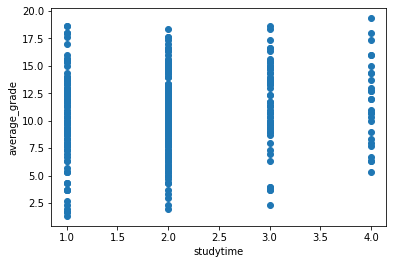

In [15]:
# Plot data

plt.scatter(df['studytime'], df['average_grade'], marker='o')
plt.xlabel('studytime')
plt.ylabel('average_grade')
plt.show()

In [21]:
# Implement linear regression using inbuilt package python Scikit 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df['studytime'].values.reshape(-1,1)
y = df['average_grade'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [34]:
# Implement   gradient   descent   algorithm   with   the function   prototype   def gradient_descent(alpha, x, y, max_iter=1500): where alpha is the learning rate, x is the input feature vector. y is the target. Subject the feature vector to normalisation step if needed. Convergence criteria: when no: of iterations exceed max_iter. [hint sum_squared_error = np.square(np.dot(features, theta) -values).sum() cost = sum_squared_error / (2*m)]

def gradient_descent(alpha, x, y, max_iter=1500):
  m = len(y)
  theta = np.zeros((2,1))
  x_b = np.c_[np.ones((len(x), 1)), x]
  for iteration in range(max_iter):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - alpha * gradients
  return theta

x = df['studytime'].values.reshape(-1,1)
y = df['average_grade'].values.reshape(-1,1)
theta = gradient_descent(0.1, x, y)
theta

array([[9.47282281],
       [0.59274667]])

In [38]:
# Vary learning rate from 0.1 to 0.9 and observe the learned parameter.

alpha = np.array([0.01, 0.03, 0.05, 0.07, 0.09])

theta = np.array([])
for i in range(len(alpha)):
  theta = np.append(theta, gradient_descent(alpha[i], x, y))
theta


array([9.27819384, 0.67662816, 9.47270409, 0.59279784, 9.47282274,
       0.5927467 , 9.47282281, 0.59274667, 9.47282281, 0.59274667])

In [45]:
# Do  simple  k-fold  and  repeated  k-fold. 

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Simple k-fold
kf = KFold()
kf.get_n_splits(x)
print(kf)
print("Simple Kfold")

for train_index, test_index in kf.split(x):
  print("TRAIN:", train_index)
  print("TEST:", test_index)
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

# Repeated k-fold
rkf = RepeatedKFold()
rkf.get_n_splits(x)
print(rkf)
print("Repeated Kfold")
for train_index, test_index in rkf.split(x):
  print("TRAIN:", train_index)
  print("TEST:", test_index)
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

# Compute error metrics ME, MAE, MSE, RMSE and compare.

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))  
print('R2 Score:', r2_score(y_test, y_pred))

KFold(n_splits=5, random_state=None, shuffle=False)
Simple Kfold
TRAIN: [ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307